In [39]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np

In [40]:
csv_files = glob.glob('results_*.csv')

In [41]:
dfs = []
for file in csv_files:
    try:
        df = pd.read_csv(file)
        df["source_file"] = file
        dfs.append(df)
    except Exception as e:
        # print(f'Error reading {file} : {e}')
        continue


data = pd.concat(dfs, ignore_index=True)

# Suppression des lignes avec au moins un NaN
# Identifier les colonnes qui correspondent aux variables 'x'
x_cols = [col for col in data.columns if col.startswith("x")]
print(x_cols)

# Supprimer les lignes qui ont au moins un NaN parmi les colonnes 'x'
data = data.dropna(subset=x_cols)


['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71']


In [42]:
# Valeur max du volume
max_vol_row = data.loc[data["volume"].idxmax()]

# Afficher l'enregistrement et le fichier source
print("Enregistrement avec volume max :")
print(max_vol_row)
print("\nNom du fichier :", max_vol_row["source_file"])

Enregistrement avec volume max :
volume                      2039155.467993
compliance                   558653.637735
x0                                 0.77004
x1                                0.078789
x2                                0.834167
                          ...             
x68                               0.903973
x69                               0.342333
x70                               0.502576
x71                                0.31374
source_file    results_20250704_131218.csv
Name: 275136, Length: 75, dtype: object

Nom du fichier : results_20250704_131218.csv


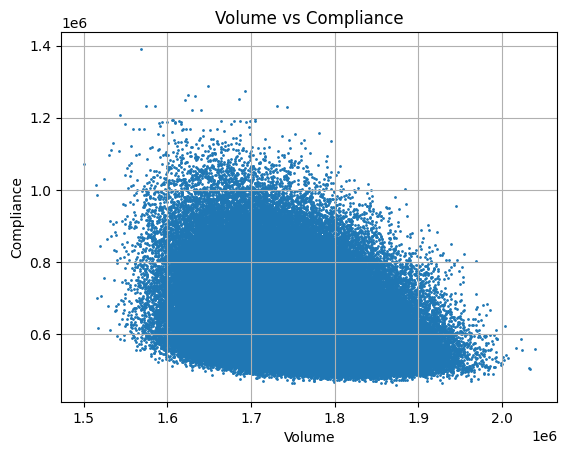

In [43]:
plt.scatter(data["volume"], data["compliance"], s=1)
plt.xlabel("Volume")
plt.ylabel("Compliance")
plt.title("Volume vs Compliance")
plt.grid(True)
plt.show()


In [44]:
# Détection du front de Pareto
points = data[["volume", "compliance"]].to_numpy()

def pareto_front_min(points):
    is_efficient = np.ones(points.shape[0], dtype=bool)
    for i, c in enumerate(points):
        if is_efficient[i]:
            is_dominated = np.all(points >= c, axis=1) & np.any(points > c, axis=1)
            is_efficient[is_dominated] = False
    return is_efficient

pareto_mask = pareto_front_min(points)
pareto_points = points[pareto_mask]

pareto_sorted = pareto_points[np.argsort(pareto_points[:, 0])]  # tri par volume

In [45]:
# Ajout des optimisations
csv_files = glob.glob('optim_*.csv')

dfs_optim = []
for file in csv_files:
    try:
        df = pd.read_csv(file)
        df["source_file"] = file
        dfs_optim.append(df)
    except Exception as e:
        # print(f'Error reading {file} : {e}')
        continue


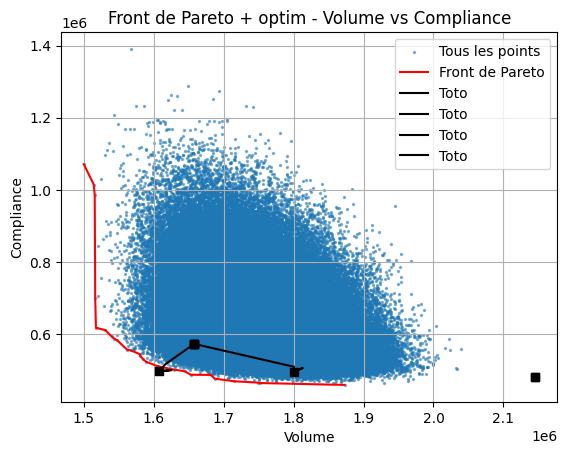

In [46]:
plt.scatter(points[:, 0], points[:, 1], s=2, alpha=0.5, label="Tous les points")
plt.plot(pareto_sorted[:, 0], pareto_sorted[:, 1], color='red', linewidth=1.5, label="Front de Pareto")
for df in dfs_optim:
    plt.plot(df['Volume'], df['Compliance'], color='black', label='Toto')
    plt.plot(df['Volume'].iloc[0], df['Compliance'].iloc[0], marker='s',
             color='black', markersize=6)
    plt.plot(df['Volume'].iloc[-1], df['Compliance'].iloc[-1], marker='s',
             color='black', markersize=6)

plt.xlabel("Volume")
plt.ylabel("Compliance")
plt.title("Front de Pareto + optim - Volume vs Compliance")
plt.legend()
plt.grid(True)
plt.show()